In [45]:
import pandas as pd
import numpy as np
import os #Interacts with the operating system, e.g. paths, mkdir
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Allows ploting in a 3D graph

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report



In [4]:
file_path = './PowerPlantsintheU_Export_TableToExcel.xlsx'
df = pd.read_excel(file_path)

In [161]:
df.head()#.iloc[:,10:30]

,OBJECTID_1,OBJECTID,Plant_Code,Plant_Name,Utility_ID,Utility_Na,sector_nam,Street_Add,City,County,...,NG_MW,Nuclear_MW,Crude_MW,Solar_MW,Wind_MW,Other_MW,Source,Period,Longitude,Latitude
0,1,13170,4068,Merrill,20860,Wisconsin Public Service Corp,Electric Utility,306 S Park St,Merrill,Lincoln,...,0.0,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305,-89.6850,45.1786
1,2,13171,4071,Potato Rapids,20860,Wisconsin Public Service Corp,Electric Utility,N4295 Potato Rapids Rd,Town of Porterfield,Marinette,...,0.0,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305,-87.7586,45.1136
2,3,13172,4072,Pulliam,20860,Wisconsin Public Service Corp,Electric Utility,1530 N Bylsby Av,Green Bay,Brown,...,79.0,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305,-88.0086,44.5400
3,4,13173,4074,Sandstone Rapids,20860,Wisconsin Public Service Corp,Electric Utility,N7633 Sandstone Lane,Town of Stephenson,Marinette,...,0.0,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305,-88.0678,45.2333
4,5,13174,4075,Tomahawk,20860,Wisconsin Public Service Corp,Electric Utility,W6080 Pride Pond Rd,Tomahawk,Lincoln,...,0.0,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305,-89.7306,45.4411


In [6]:
df.nunique()

OBJECTID_1    12008
OBJECTID      12008
Plant_Code    12008
Plant_Name    11985
Utility_ID     5123
Utility_Na     5109
sector_nam        7
Street_Add    11193
City           4871
County         1441
State            52
Zip            6637
PrimSource       12
source_des     3952
tech_desc       154
Install_MW     2163
Total_MW       2044
Bat_MW          114
Bio_MW          247
Coal_MW         220
Geo_MW           58
Hydro_MW        492
HydroPS_MW       41
NG_MW          1122
Nuclear_MW       55
Crude_MW        334
Solar_MW        393
Wind_MW         593
Other_MW         79
Source            1
Period            1
Longitude     11726
Latitude      11657
dtype: int64

In [178]:
df_outlier = df[df['Install_MW']>5000].copy() # save the outlier in a df
df.drop(df_outlier.index,inplace = True) # drop the outlier from the original df

In [195]:
# Calculate the total of production of energy by State
df_powerByState = df.groupby('State')[['Install_MW','Total_MW']].sum().reset_index()
# Rename columns 
df_powerByState.rename(columns={'Install_MW':'Install_MW_State','Total_MW':'Total_MW_State'},inplace=True)
# Merge the total with the df
df = pd.merge(df,df_powerByState, on = 'State')

In [196]:
# Select columns to analyze
Scolumns = ['sector_nam','PrimSource','Install_MW','Total_MW','Install_MW_State','Total_MW_State']
df[Scolumns]

,sector_nam,PrimSource,Install_MW,Total_MW,Install_MW_State,Total_MW_State
0,Electric Utility,hydroelectric,2.3,2.3,18146.5,16742.1
1,Electric Utility,hydroelectric,1.3,1.3,18146.5,16742.1
2,Electric Utility,natural gas,91.0,79.0,18146.5,16742.1
3,Electric Utility,hydroelectric,3.8,3.8,18146.5,16742.1
4,Electric Utility,hydroelectric,2.6,2.6,18146.5,16742.1
...,...,...,...,...,...,...
12002,Commercial CHP,natural gas,6.0,6.0,6527.7,5981.0
12003,Commercial Non-CHP,petroleum,3.8,2.4,6527.7,5981.0
12004,Industrial Non-CHP,petroleum,27.6,27.6,6527.7,5981.0
12005,Industrial Non-CHP,petroleum,8.2,8.2,6527.7,5981.0


C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

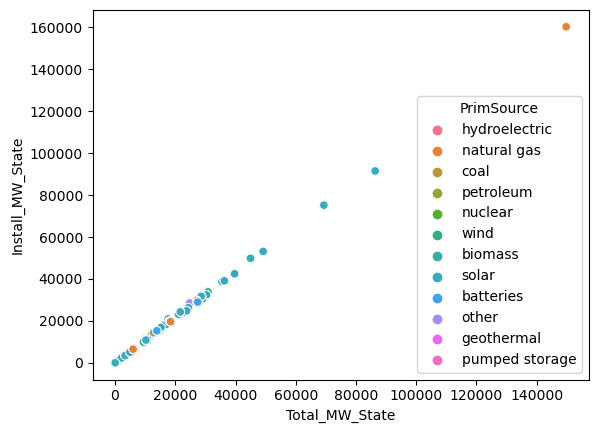

In [204]:
sns.scatterplot(data = df, x = df.Total_MW_State, y = df.Install_MW_State, hue = 'PrimSource')

plt.show()

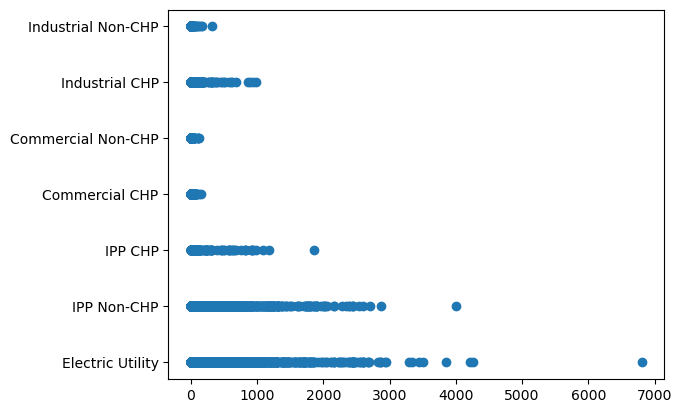

In [34]:


plt.scatter(df.Install_MW,df.sector_nam)

plt.show()

In [ ]:
sns.scatterplot(df, df.)

C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

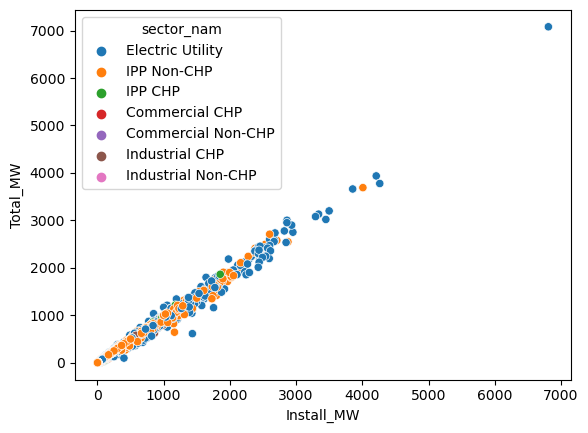

In [37]:

sns.scatterplot(data = df, x = df.Install_MW, y = df.Total_MW,hue='sector_nam')


# plt.xlabel('Birth Rate')
# plt.ylabel('Unemployment rate(%)')
# plt.title('Scatterplot of Birth Rate vs Unemployment rate(%)')


plt.show()

C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

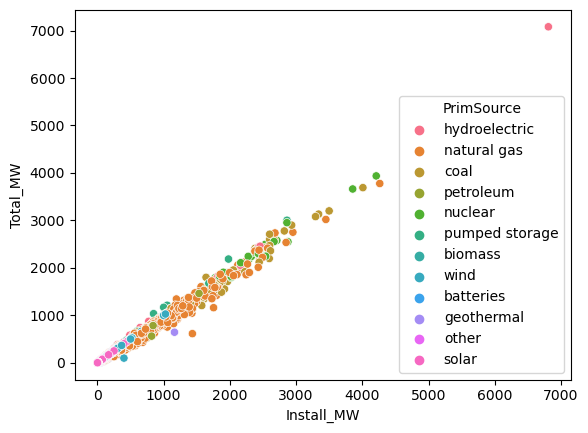

In [42]:

sns.scatterplot(data = df, x = df.Install_MW, y = df.Total_MW,hue='PrimSource')


# plt.xlabel('Birth Rate')
# plt.ylabel('Unemployment rate(%)')
# plt.title('Scatterplot of Birth Rate vs Unemployment rate(%)')


plt.show()

C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='sector_nam', ylabel='Install_MW'>

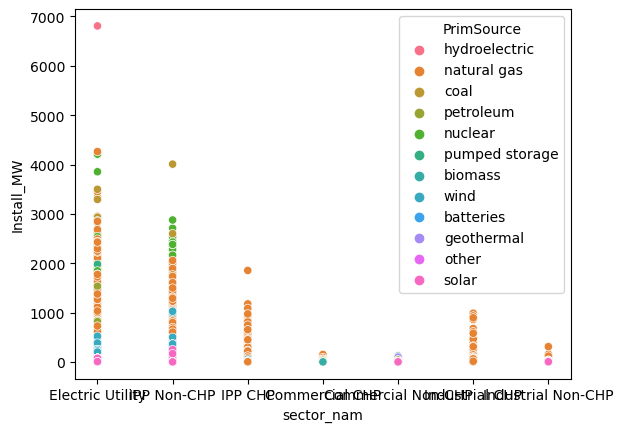

In [39]:
sns.scatterplot(data=df, x = df.sector_nam, y = df.Install_MW, hue = 'PrimSource')

C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='PrimSource', ylabel='Total_MW'>

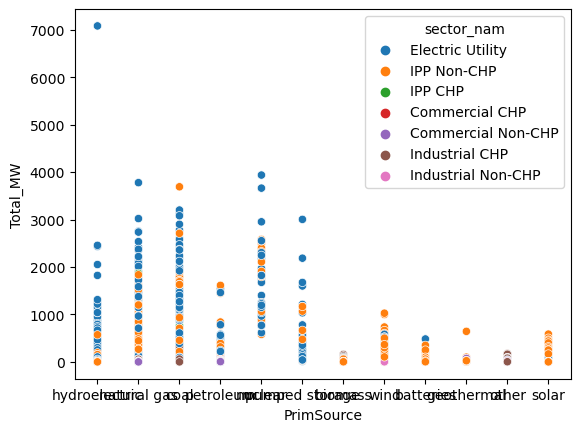

In [41]:
sns.scatterplot(data = df, x = df.PrimSource, y = df.Total_MW, hue = df.sector_nam)

In [140]:
df_KMeans = df[Scolumns].copy()

label_encoder = LabelEncoder()

df_KMeans['Sector_encoded'] = label_encoder.fit_transform(df_KMeans.sector_nam)
df_KMeans['PimSource_encoded'] = label_encoder.fit_transform(df_KMeans.PrimSource)

df_KMeans.nunique()

sector_nam              7
PrimSource             12
Install_MW           2163
Total_MW             2044
Sector_encoded          7
PimSource_encoded      12
dtype: int64

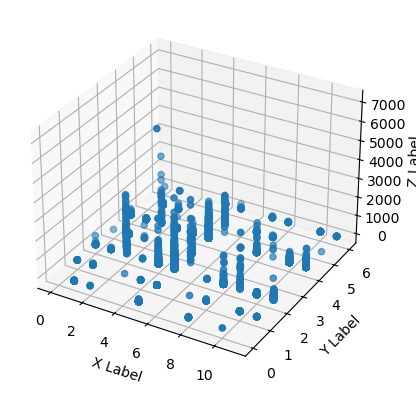

In [141]:
# Create a new figure with 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data in 3D
ax.scatter(df_KMeans.PimSource_encoded, df_KMeans.Sector_encoded, df.Total_MW)

# Set labels for the axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [142]:

df_KMeans[['SInstall_MW','STotal_MW','SSector_encoded','SPimSource_encoded']] = StandardScaler().fit_transform(df_KMeans[['Install_MW','Total_MW','Sector_encoded','PimSource_encoded']])
df_KMeans

,sector_nam,PrimSource,Install_MW,Total_MW,Sector_encoded,PimSource_encoded,SInstall_MW,STotal_MW,SSector_encoded,SPimSource_encoded
0,Electric Utility,hydroelectric,2.3,2.3,2,4,-0.330813,-0.328603,-1.131166,-1.100870
1,Electric Utility,hydroelectric,1.3,1.3,2,4,-0.334016,-0.332048,-1.131166,-1.100870
2,Electric Utility,natural gas,91.0,79.0,2,5,-0.046664,-0.064370,-1.131166,-0.790901
3,Electric Utility,hydroelectric,3.8,3.8,2,4,-0.326008,-0.323435,-1.131166,-1.100870
4,Electric Utility,hydroelectric,2.6,2.6,2,4,-0.329852,-0.327569,-1.131166,-1.100870
...,...,...,...,...,...,...,...,...,...,...
12003,IPP Non-CHP,solar,3.0,3.0,4,10,-0.328570,-0.326191,0.577608,0.758944
12004,IPP Non-CHP,solar,3.0,3.0,4,10,-0.328570,-0.326191,0.577608,0.758944
12005,IPP Non-CHP,solar,5.0,5.0,4,10,-0.322164,-0.319301,0.577608,0.758944
12006,IPP Non-CHP,solar,1.4,1.4,4,10,-0.333696,-0.331703,0.577608,0.758944


In [144]:
df_KMeans.iloc[:,6:]
# km.fit_predict(df_KMeans.iloc[:,2:].values)


,SInstall_MW,STotal_MW,SSector_encoded,SPimSource_encoded
0,-0.330813,-0.328603,-1.131166,-1.100870
1,-0.334016,-0.332048,-1.131166,-1.100870
2,-0.046664,-0.064370,-1.131166,-0.790901
3,-0.326008,-0.323435,-1.131166,-1.100870
4,-0.329852,-0.327569,-1.131166,-1.100870
...,...,...,...,...
12003,-0.328570,-0.326191,0.577608,0.758944
12004,-0.328570,-0.326191,0.577608,0.758944
12005,-0.322164,-0.319301,0.577608,0.758944
12006,-0.333696,-0.331703,0.577608,0.758944


In [154]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_KMeans.iloc[:,6:])
df_KMeans['Cluster'] = y_predicted

C:\Users\crist\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [155]:
df_KMeans

,sector_nam,PrimSource,Install_MW,Total_MW,Sector_encoded,PimSource_encoded,SInstall_MW,STotal_MW,SSector_encoded,SPimSource_encoded,Cluster
0,Electric Utility,hydroelectric,2.3,2.3,2,4,-0.330813,-0.328603,-1.131166,-1.100870,2
1,Electric Utility,hydroelectric,1.3,1.3,2,4,-0.334016,-0.332048,-1.131166,-1.100870,2
2,Electric Utility,natural gas,91.0,79.0,2,5,-0.046664,-0.064370,-1.131166,-0.790901,2
3,Electric Utility,hydroelectric,3.8,3.8,2,4,-0.326008,-0.323435,-1.131166,-1.100870,2
4,Electric Utility,hydroelectric,2.6,2.6,2,4,-0.329852,-0.327569,-1.131166,-1.100870,2
...,...,...,...,...,...,...,...,...,...,...,...
12003,IPP Non-CHP,solar,3.0,3.0,4,10,-0.328570,-0.326191,0.577608,0.758944,0
12004,IPP Non-CHP,solar,3.0,3.0,4,10,-0.328570,-0.326191,0.577608,0.758944,0
12005,IPP Non-CHP,solar,5.0,5.0,4,10,-0.322164,-0.319301,0.577608,0.758944,0
12006,IPP Non-CHP,solar,1.4,1.4,4,10,-0.333696,-0.331703,0.577608,0.758944,0


C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Total_MW', ylabel='Install_MW'>

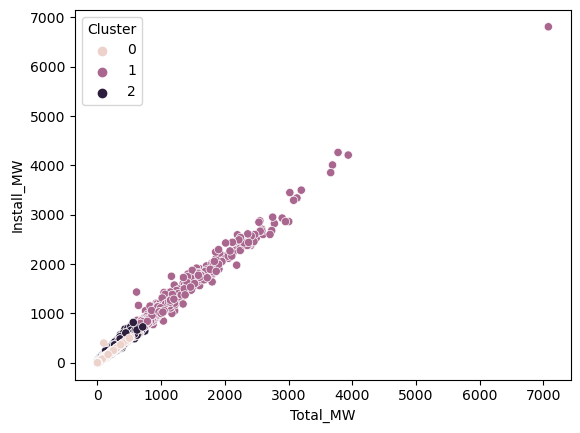

In [160]:

sns.scatterplot(data = df_KMeans, x=df_KMeans.Total_MW, y=df_KMeans.Install_MW, hue = 'Cluster')

C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='STotal_MW', ylabel='SInstall_MW'>

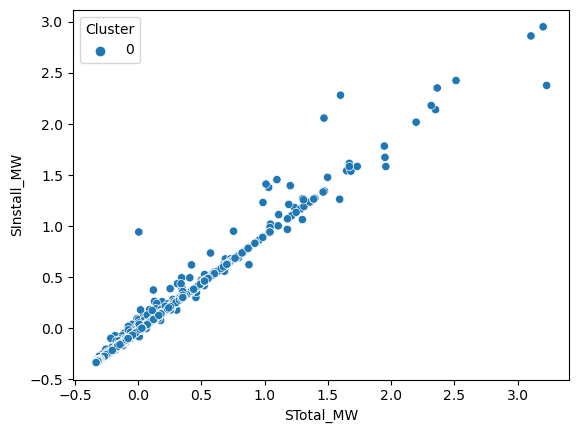

In [123]:
df1 = df_KMeans[df_KMeans['Cluster']==0]
sns.scatterplot(data = df1, x=df1.STotal_MW, y=df1.SInstall_MW, hue = 'Cluster')

In [136]:
wcss = []

for k in range(1,11):
    km = KMeans(n_clusters=k)
    km.fit(df_KMeans.iloc[:,6:])
    wcss.append(km.inertia_)
    


C:\Users\crist\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\crist\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\crist\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\crist\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

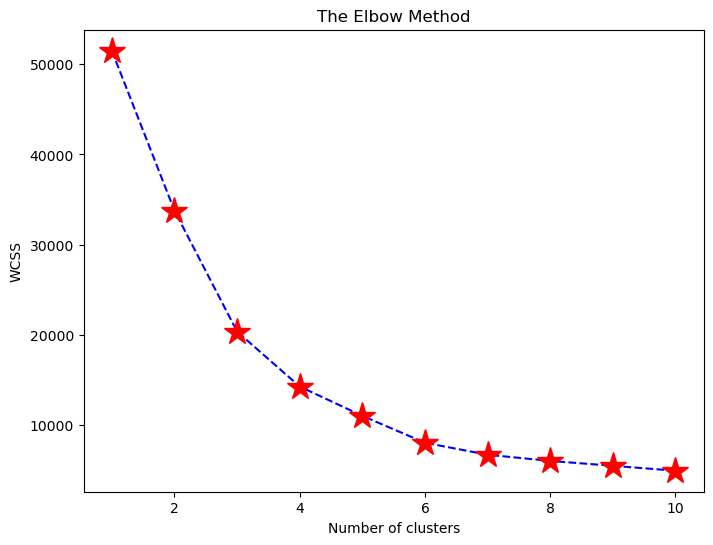

In [137]:
fx, ax = plt.subplots(figsize = (8,6))

plt.plot(range(1,11), wcss, marker = '*', linestyle = '--', color='b', markerfacecolor = 'r', mec = 'r', ms = 20)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
